In [19]:
import numpy as np
import tensorflow as tf
import os
import cv2
import h5py
import matplotlib.pyplot as plt

In [20]:
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.core import Lambda, Flatten, Dense
from keras.models import Sequential
from keras.layers.merge import Concatenate
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')


In [21]:
from fr_utils import *
from inception_blocks_v2 import *

In [22]:
FRmodel = faceRecoModel(input_shape=(3, 96, 96))
FRmodel

In [23]:
FRmodel.count_params()

3743280

In [24]:
def triplet_loss(y_true, y_pred, alpha = 0.2):
    
    
    
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
   
    pos_dist =tf.reduce_sum(tf.square(tf.subtract(anchor,positive)),axis=-1)
    
    neg_dist =tf.reduce_sum(tf.square(tf.subtract(anchor,negative)),axis=-1)
  
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    
    loss = tf.reduce_sum(tf.maximum(basic_loss,0))

    
    return loss

In [25]:
FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(FRmodel)

In [26]:
database={}
database['megha']=img_to_encoding('megha.png',FRmodel)
database['mayank']=img_to_encoding('mayank.png',FRmodel)

In [27]:
def tell(image_path, database, model):
    
    encoding =img_to_encoding(image_path, model)
    min_dist = 100
    for (name, db_enc) in database.items():
        dist = np.linalg.norm(encoding-db_enc)

        if dist<min_dist:
            min_dist = dist
            identity = name
    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [28]:
img_megha=cv2.imread('megha.png')
img_megha1=cv2.imread('megha1.png')
img_mayank=cv2.imread('mayank.png')
img_mayank1=cv2.imread('mayank1.png')

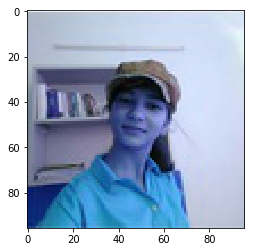

In [29]:
plt.imshow(img_megha)

In [30]:
tell("megha1.png", database, FRmodel)

it's megha, the distance is 0.52750045


(0.52750045, 'megha')

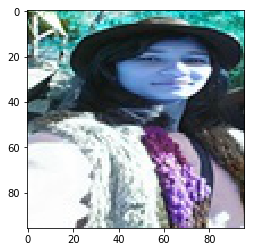

In [31]:
plt.imshow(img_megha1)

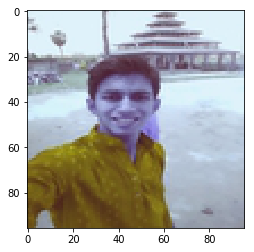

In [32]:
plt.imshow(img_mayank)

In [33]:
tell('mayank1.png',database,FRmodel)

it's mayank, the distance is 0.5817014


(0.5817014, 'mayank')

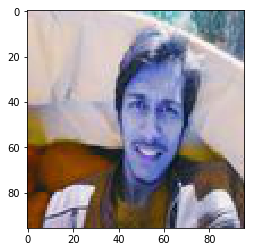

In [34]:
plt.imshow(img_mayank1)